# Column Descriptions

| Column Name    | Description                                                                                          |
|----------------|------------------------------------------------------------------------------------------------------|
| sex            | Gender of the individual (female, male)                                                               |
| age            | Age of the individual. Crucial for assessing the risk of coronary heart disease                       |
| education      | Level of education of the individual, coded with categorical values                                   |
| smokingStatus  | Smoking status of the individual (yes for smokers, no for non-smokers)                                |
| cigsPerDay     | Number of cigarettes smoked per day by the individual if they are a smoker                             |
| BPMeds         | Indicates if the individual is taking blood pressure medications (0 for no, 1 for yes)                |
| prevalentStroke| Indicates if the individual has had a stroke prior to the study (0 for no, 1 for yes)                  |
| prevalentHyp   | Indicates if the individual has hypertension (0 for no, 1 for yes)                                     |
| diabetes       | Indicates if the individual has diabetes (0 for no, 1 for yes)                                         |
| totChol        | Total cholesterol level of the individual                                                             |
| sysBP          | Systolic blood pressure of the individual                                                             |
| diaBP          | Diastolic blood pressure of the individual                                                            |
| BMI            | Body Mass Index (BMI) of the individual, a measure of body fat based on height and weight             |
| heartRate      | Resting heart rate of the individual                                                                  |
| glucose        | Fasting blood glucose level of the individual                                                         |
| CHDRisk        | Ten-Year Coronary Heart Disease (CHD) Risk for each individual (target variable)                      |

In [1]:
## Import the library
import pandas as pd # type: ignore
import numpy  as np # type: ignore
import matplotlib.pyplot as   plt
import seaborn as sns
import plotly.express as px



In [2]:
data=pd.read_csv(r"F:\coarses\task data-20220731T114903Z-001\Heart_Disease_project\Heart_Disease.csv")

In [3]:
data.head()

sex  age  education smokingStatus  cigsPerDay  BPMeds  prevalentStroke  \
0    male   39          4            no           0       0                0   
1  female   46          2            no           0       0                0   
2    male   48          1           yes          20       0                0   
3  female   61          3           yes          30       0                0   
4  female   46          3           yes          23       0                0   

   prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0       no      195  106.0   70.0  26.97         80       77   
1             0       no      250  121.0   81.0  28.73         95       76   
2             0       no      245  127.5   80.0  25.34         75       70   
3             1       no      225  150.0   95.0  28.58         65      103   
4             0       no      285  130.0   84.0  23.10         85       85   

  CHDRisk  
0      no  
1      no  
2      no  
3     yes  
4      no

In [4]:
# shadow of the data
df = data.copy()

# Exploring Data

In [5]:
df.isna().sum()

sex                11
age                 0
education           0
smokingStatus      13
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
CHDRisk             0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

15

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3637 entries, 0 to 3673
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3637 non-null   object 
 1   age              3637 non-null   int64  
 2   education        3637 non-null   int64  
 3   smokingStatus    3637 non-null   object 
 4   cigsPerDay       3637 non-null   int64  
 5   BPMeds           3637 non-null   int64  
 6   prevalentStroke  3637 non-null   int64  
 7   prevalentHyp     3637 non-null   int64  
 8   diabetes         3637 non-null   object 
 9   totChol          3637 non-null   int64  
 10  sysBP            3637 non-null   float64
 11  diaBP            3637 non-null   float64
 12  BMI              3637 non-null   float64
 13  heartRate        3637 non-null   int64  
 14  glucose          3637 non-null   int64  
 15  CHDRisk          3637 non-null   object 
dtypes: float64(3), int64(9), object(4)
memory usage: 483.0+ KB


In [10]:
## convert the BPMeds ,prevalentStroke,prevalentHyp from bool to object 

df['BPMeds'] = df['BPMeds'].apply(lambda x:'yes' if x == 1 else 'no' )
df['prevalentStroke'] = df['prevalentStroke'].apply(lambda x: 'yes' if x == 1 else 'no' )
df['prevalentHyp'] = df['prevalentHyp'].apply(lambda x: 'yes' if x == 1 else 'no' )



In [11]:
df.dtypes

sex                 object
age                  int64
education            int64
smokingStatus       object
cigsPerDay           int64
BPMeds              object
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol              int64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
glucose              int64
CHDRisk             object
dtype: object

In [12]:
df.head()

sex  age  education smokingStatus  cigsPerDay BPMeds prevalentStroke  \
0    male   39          4            no           0     no              no   
1  female   46          2            no           0     no              no   
2    male   48          1           yes          20     no              no   
3  female   61          3           yes          30     no              no   
4  female   46          3           yes          23     no              no   

  prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0           no       no      195  106.0   70.0  26.97         80       77   
1           no       no      250  121.0   81.0  28.73         95       76   
2           no       no      245  127.5   80.0  25.34         75       70   
3          yes       no      225  150.0   95.0  28.58         65      103   
4           no       no      285  130.0   84.0  23.10         85       85   

  CHDRisk  
0      no  
1      no  
2      no  
3     yes  
4      no

In [13]:
df.describe()

age    education   cigsPerDay      totChol        sysBP  \
count  3637.000000  3637.000000  3637.000000  3637.000000  3637.000000   
mean     49.549629     1.978554     9.027770   236.879846   132.359087   
std       8.559992     1.022078    11.913031    44.130297    22.079468   
min      32.000000     1.000000     0.000000   113.000000    83.500000   
25%      42.000000     1.000000     0.000000   206.000000   117.000000   
50%      49.000000     2.000000     0.000000   234.000000   128.000000   
75%      56.000000     3.000000    20.000000   263.000000   144.000000   
max      70.000000     4.000000    70.000000   600.000000   295.000000   

             diaBP          BMI    heartRate      glucose  
count  3637.000000  3637.000000  3637.000000  3637.000000  
mean     82.902805    25.786607    75.749244    81.808908  
std      11.956057     4.059526    11.992954    23.766825  
min      48.000000    15.540000    44.000000    40.000000  
25%      75.000000    23.080000    68.000000    71.000000  
50%      82.000000    25.380000    75.000000    78.000000  
75%      90.000000    28.040000    82.000000    87.000000  
max     142.500000    56.800000   143.000000   394.000000

In [14]:
df.describe(include='object')

sex smokingStatus BPMeds prevalentStroke prevalentHyp diabetes  \
count     3637          3637   3637            3637         3637     3637   
unique       2             2      2               2            2        2   
top     female            no     no              no           no       no   
freq      2026          1857   3527            3616         2502     3540   

       CHDRisk  
count     3637  
unique       2  
top         no  
freq      3084

## Quick Summary Of Categorical Data

In [15]:
for col in df.columns:

    # Check column dtype
    if df[col].dtype == 'object':

        # Column details
        print(f"Column: {col}")

        # Number of unique values
        print(f"Unique values: {df[col].unique()}")

        # Value counts
        print(df[col].value_counts().reset_index().sort_values(col))

        # Separator
        print("="*200)

Column: sex
Unique values: ['male' 'female']
      sex  count
0  female   2026
1    male   1611
Column: smokingStatus
Unique values: ['no' 'yes']
  smokingStatus  count
0            no   1857
1           yes   1780
Column: BPMeds
Unique values: ['no' 'yes']
  BPMeds  count
0     no   3527
1    yes    110
Column: prevalentStroke
Unique values: ['no' 'yes']
  prevalentStroke  count
0              no   3616
1             yes     21
Column: prevalentHyp
Unique values: ['no' 'yes']
  prevalentHyp  count
0           no   2502
1          yes   1135
Column: diabetes
Unique values: ['no' 'yes']
  diabetes  count
0       no   3540
1      yes     97
Column: CHDRisk
Unique values: ['no' 'yes']
  CHDRisk  count
0      no   3084
1     yes    553


## Quick Summary Of Numerical Data¶

In [16]:
for col in df.columns:

    # Check column numiric
    if df[col].dtype != 'object':

        # Column details
        print(f"Column: {col}")

        # max & min values
        print(f"max: {df[col].max()}",f"min: {df[col].min()}")

        # Separator
        print("="*200)

Column: age
max: 70 min: 32
Column: education
max: 4 min: 1
Column: cigsPerDay
max: 70 min: 0
Column: totChol
max: 600 min: 113
Column: sysBP
max: 295.0 min: 83.5
Column: diaBP
max: 142.5 min: 48.0
Column: BMI
max: 56.8 min: 15.54
Column: heartRate
max: 143 min: 44
Column: glucose
max: 394 min: 40


# Univariate Analysis 

In [17]:
## Ctreat the healthy coulmn
# Define the thresholds for each column
thresholds = {
    'sysBP': {'Normal': 120, 'Elevated': 129, 'High': 130},
    'diaBP': {'Normal': 80, 'Elevated': 89, 'High': 90},
    'BMI': {'Underweight': 18.5, 'Normal weight': 24.9, 'Overweight': 29.9, 'Obesity': 30},
    'heartRate': {'Normal': 60, 'Elevated': 100, 'High': 101},
    'glucose': {'Normal': 99, 'Prediabetes': 125, 'Diabetes': 126},
    'totChol': {'Desirable': 200, 'Borderline High': 239, 'High': 240}
}

# Define the conditions for being considered 'healthy'
conditions = [
    (df['cigsPerDay'] >= 0) & (df['cigsPerDay'] <= 20),
    (df['BPMeds'] == 'no'),
    (df['prevalentStroke'] == 'no'),
    (df['prevalentHyp'] == 'no'),
    (df['diabetes'] == 'no'),
    (df['totChol'] <= thresholds['totChol']['Borderline High']),
    (df['sysBP'] <= thresholds['sysBP']['Elevated']),
    (df['diaBP'] <= thresholds['diaBP']['Elevated']),
    (df['BMI'] > thresholds['BMI']['Underweight']) & (df['BMI'] <= thresholds['BMI']['Overweight']),
    (df['heartRate'] >= thresholds['heartRate']['Normal']) & (df['heartRate'] <= thresholds['heartRate']['Elevated']),
    (df['glucose'] <= thresholds['glucose']['Prediabetes'])
]

# Combine all conditions using logical AND
combined_conditions = np.logical_and.reduce(conditions)

# All conditions must be true to be considered 'healthy'
df['healthy'] = np.where(combined_conditions, 'yes', 'no')


In [18]:
df.head()

sex  age  education smokingStatus  cigsPerDay BPMeds prevalentStroke  \
0    male   39          4            no           0     no              no   
1  female   46          2            no           0     no              no   
2    male   48          1           yes          20     no              no   
3  female   61          3           yes          30     no              no   
4  female   46          3           yes          23     no              no   

  prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0           no       no      195  106.0   70.0  26.97         80       77   
1           no       no      250  121.0   81.0  28.73         95       76   
2           no       no      245  127.5   80.0  25.34         75       70   
3          yes       no      225  150.0   95.0  28.58         65      103   
4           no       no      285  130.0   84.0  23.10         85       85   

  CHDRisk healthy  
0      no     yes  
1      no      no  
2      no      no  
3     yes      no  
4      no      no

In [19]:
## Make Classfication Depend On Threshld 

# Existing thresholds dictionary
thresholds = {
    'sysBP': {'Normal': 120, 'Elevated': 129, 'High': 130},
    'diaBP': {'Normal': 80, 'Elevated': 89, 'High': 90},
    'BMI': {'Underweight': 18.5, 'Normal weight': 24.9, 'Overweight': 29.9, 'Obesity': 30},
    'heartRate': {'Normal': 60, 'Elevated': 100, 'High': 101},
    'glucose': {'Normal': 99, 'Prediabetes': 125, 'Diabetes': 126},
    'totChol': {'Desirable': 200, 'Borderline High': 239, 'High': 240},
    'Smokers': { 'NonSmokers': 0,'Smokers': 20,'Dangerous Smokers': 50,'High Smokers': 70
    }
}

# Function to classify sysBP
def classify_sysBP(value):
    if value <= thresholds['sysBP']['Normal']:
        return 'Normal'
    elif value <= thresholds['sysBP']['Elevated']:
        return 'Elevated'
    else:
        return 'High'

# Function to classify diaBP
def classify_diaBP(value):
    if value <= thresholds['diaBP']['Normal']:
        return 'Normal'
    elif value <= thresholds['diaBP']['Elevated']:
        return 'Elevated'
    else:
        return 'High'

# Function to classify BMI
def classify_BMI(value):
    if value < thresholds['BMI']['Underweight']:
        return 'Underweight'
    elif value <= thresholds['BMI']['Normal weight']:
        return 'Normal weight'
    elif value <= thresholds['BMI']['Overweight']:
        return 'Overweight'
    else:
        return 'Obesity'

# Function to classify heartRate
def classify_heartRate(value):
    if value <= thresholds['heartRate']['Normal']:
        return 'Normal'
    elif value <= thresholds['heartRate']['Elevated']:
        return 'Elevated'
    else:
        return 'High'

# Function to classify glucose
def classify_glucose(value):
    if value <= thresholds['glucose']['Normal']:
        return 'Normal'
    elif value <= thresholds['glucose']['Prediabetes']:
        return 'Prediabetes'
    else:
        return 'Diabetes'

# Function to classify totChol
def classify_totChol(value):
    if value <= thresholds['totChol']['Desirable']:
        return 'Desirable'
    elif value <= thresholds['totChol']['Borderline High']:
        return 'Borderline High'
    else:
        return 'High'

# Function to classify smokers
def classify_smokers(value):
    if value == 0:
        return 'NonSmokers'
    elif value <= thresholds['Smokers']['Smokers']:
        return 'Smokers'
    elif value <= thresholds['Smokers']['Dangerous Smokers']:
        return 'Dangerous Smokers'
    else:
        return 'High Smokers'

# Assuming df is your DataFrame and it has the necessary columns.
# Apply the classification functions to each column
df['sysBP_Class'] = df['sysBP'].apply(classify_sysBP)
df['diaBP_Class'] = df['diaBP'].apply(classify_diaBP)
df['BMI_Class'] = df['BMI'].apply(classify_BMI)
df['heartRate_Class'] = df['heartRate'].apply(classify_heartRate)
df['glucose_Class'] = df['glucose'].apply(classify_glucose)
df['totChol_Class'] = df['totChol'].apply(classify_totChol)
df['smoker_Class'] = df['cigsPerDay'].apply(classify_smokers)



In [20]:
df.head()

sex  age  education smokingStatus  cigsPerDay BPMeds prevalentStroke  \
0    male   39          4            no           0     no              no   
1  female   46          2            no           0     no              no   
2    male   48          1           yes          20     no              no   
3  female   61          3           yes          30     no              no   
4  female   46          3           yes          23     no              no   

  prevalentHyp diabetes  totChol  ...  glucose  CHDRisk  healthy  sysBP_Class  \
0           no       no      195  ...       77       no      yes       Normal   
1           no       no      250  ...       76       no       no     Elevated   
2           no       no      245  ...       70       no       no     Elevated   
3          yes       no      225  ...      103      yes       no         High   
4           no       no      285  ...       85       no       no         High   

   diaBP_Class      BMI_Class heartRate_Class glucose_Class    totChol_Class  \
0       Normal     Overweight        Elevated        Normal        Desirable   
1     Elevated     Overweight        Elevated        Normal             High   
2       Normal     Overweight        Elevated        Normal             High   
3         High     Overweight        Elevated   Prediabetes  Borderline High   
4     Elevated  Normal weight        Elevated        Normal             High   

        smoker_Class  
0         NonSmokers  
1         NonSmokers  
2            Smokers  
3  Dangerous Smokers  
4  Dangerous Smokers  

[5 rows x 24 columns]

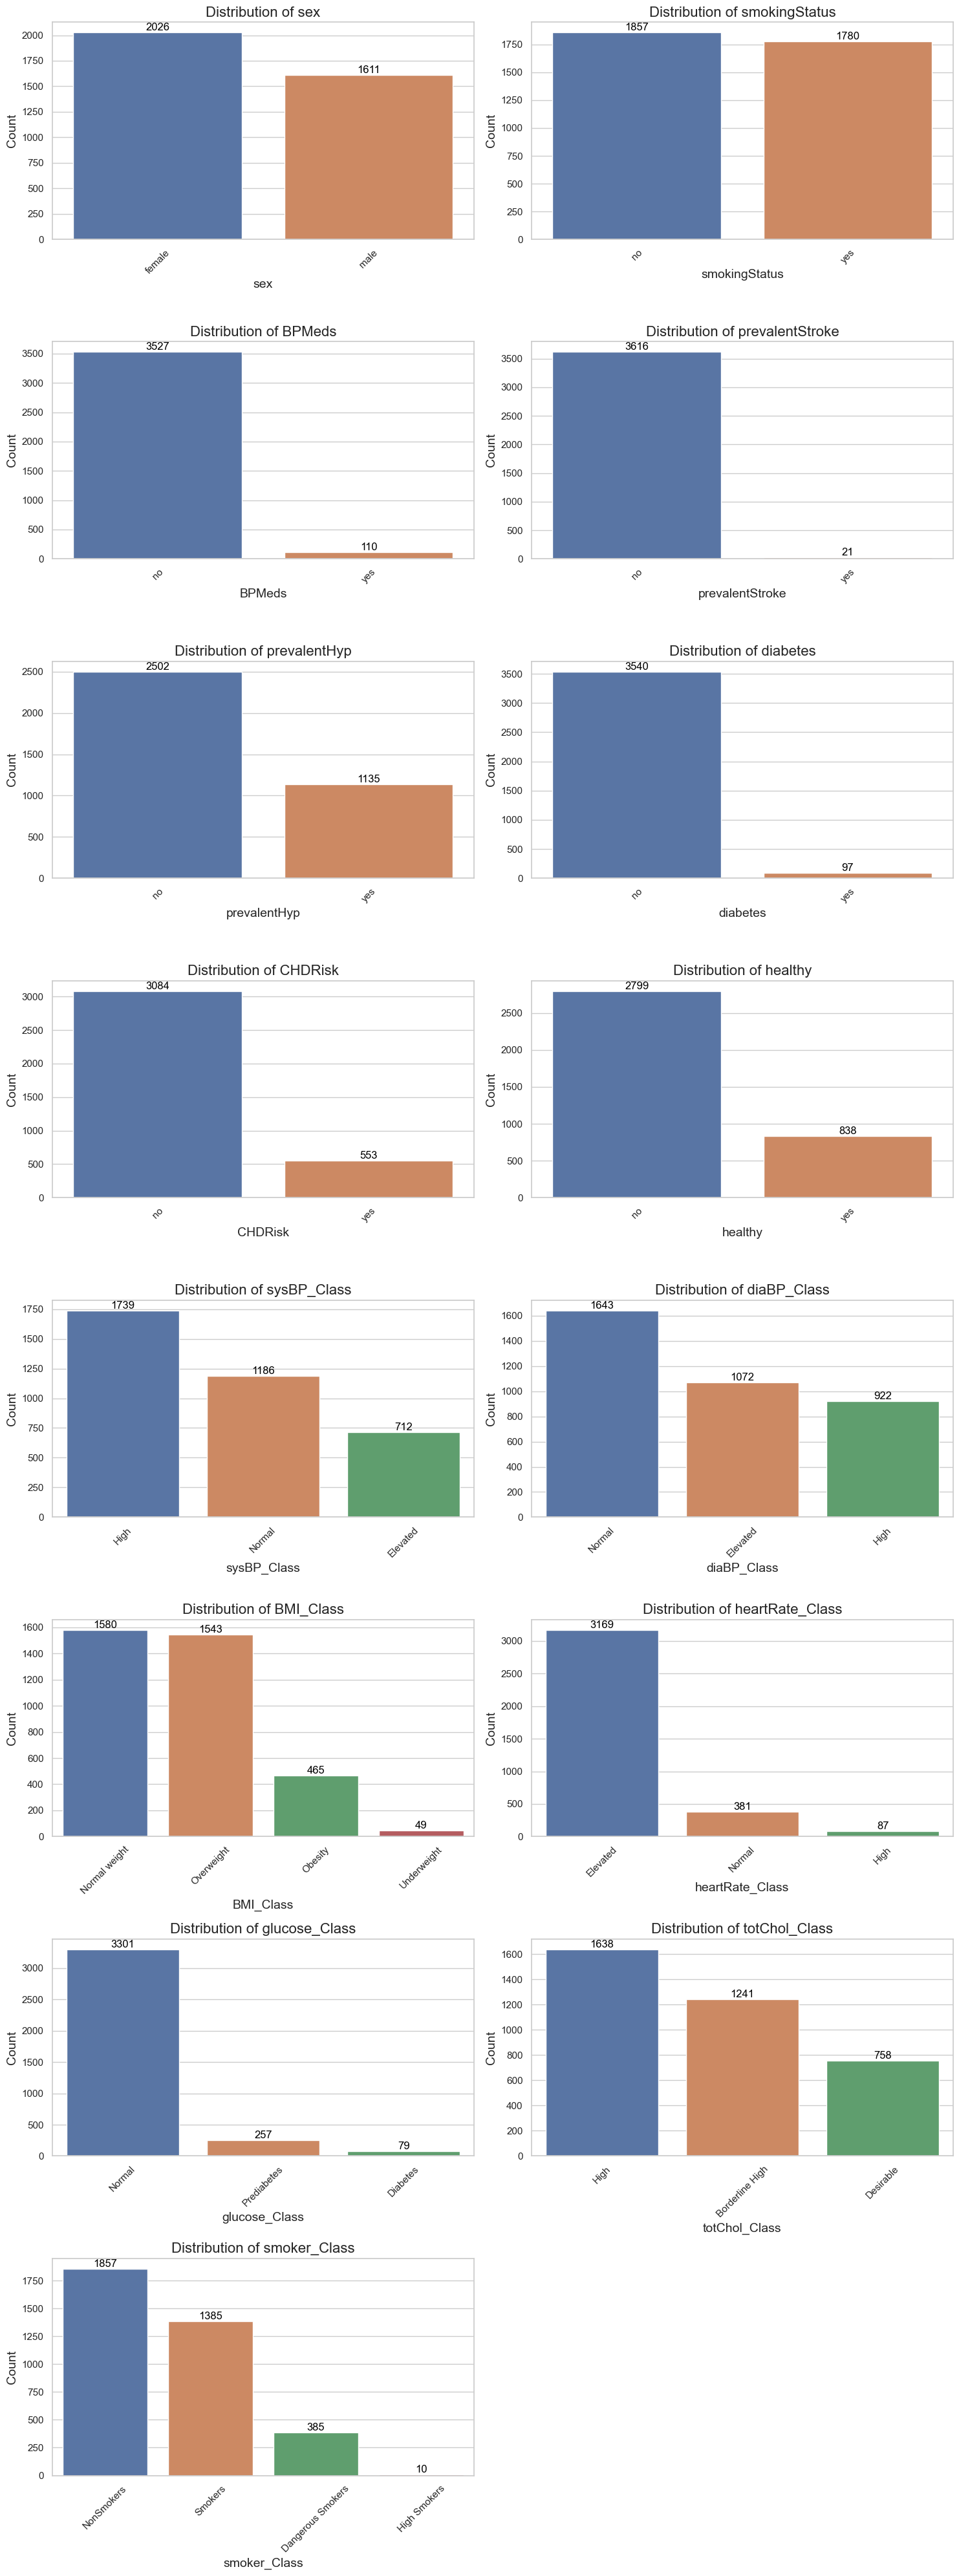

In [21]:
#Bar plot (Catigorical)
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Select non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Determine the number of rows and columns needed for subplots
num_cols = 2
num_rows = (len(non_numeric_columns) + 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the non-numeric columns and create a bar plot for each
for i, col in enumerate(non_numeric_columns):
    
    # Calculate counts
    counts = df[col].value_counts()

    # Create bar plot
    ##sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette="viridis")
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i], hue=counts.index)

    # Set the title and labels
    axes[i].set_title(f"Distribution of {col}", fontsize=16)
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel('Count', fontsize=14)

    # Improve layout
    axes[i].tick_params(axis='x', rotation=45)

    # Add annotations for counts on the bars
    for index, value in enumerate(counts.values):
        axes[i].text(index, value, str(value), color='black', ha="center", va='bottom')

    

# If the number of non-numeric columns is odd, remove the last (empty) subplot
if len(non_numeric_columns) % num_cols:
    fig.delaxes(axes[-1])

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

| Category                       | Distribution | Count   | Insight                                                                                   |
|--------------------------------|--------------|---------|-------------------------------------------------------------------------------------------|
| Sex                            | Female       | 2026    | There are more females than males in the dataset.                                        |
|                                | Male         | 1611    |                                                                                           |
| Smoking Status                 | No           | 1857    | The number of smokers and non-smokers is fairly balanced, with a slight predominance of non-smokers. |
|                                | Yes          | 1780    |                                                                                           |
| BPMeds (Blood Pressure Meds)   | No           | 3527    | The vast majority of participants are not on blood pressure medication.                    |
|                                | Yes          | 110     |                                                                                           |
| Prevalent Stroke               | No           | 3616    | Very few participants have had a stroke.                                                  |
|                                | Yes          | 21      |                                                                                           |
| Prevalent Hypertension         | No           | 2502    | A significant portion of participants have hypertension, but those without it are still in the majority. |
|                                | Yes          | 1135    |                                                                                           |
| Diabetes                       | No           | 3540    | Few participants have diabetes.                                                           |
|                                | Yes          | 97      |                                                                                           |
| CHDRisk (Coronary Heart Disease)| No           | 3084    | A notable number of participants are at risk for coronary heart disease, but those without risk are in the majority. |
|                                | Yes          | 553     |                                                                                           |
| Healthy                        | No           | 2799    | The majority of participants are not classified as healthy.                                |
|                                | Yes          | 838     |                                                                                           |
| SysBP_Class (Systolic BP)      | High         | 1739    | There are more participants with high systolic blood pressure compared to normal or elevated. |
|                                | Normal       | 1168    |                                                                                           |
|                                | Elevated     | 712     |                                                                                           |
| DiaBP_Class (Diastolic BP)     | Normal       | 1643    | More participants have normal diastolic blood pressure than elevated or high.               |
|                                | Elevated     | 1072    |                                                                                           |
|                                | High         | 927     |                                                                                           |
| BMI_Class (Body Mass Index)    | Normal weight| 1560    | The majority of participants are either of normal weight or overweight, with fewer classified as obese or underweight. |
|                                | Overweight   | 1543    |                                                                                           |
|                                | Obesity      | 465     |                                                                                           |
|                                | Underweight  | 49      |                                                                                           |
| HeartRate_Class                | Elevated     | 3169    | Most participants have an elevated heart rate.                                             |
|                                | Normal       | 381     |                                                                                           |
|                                | High         | 87      |                                                                                           |
| Glucose_Class                  | Normal       | 3301    | The majority of participants have normal glucose levels, with fewer in the pre-diabetes or diabetes categories. |
|                                | Pre-diabetes | 257     |                                                                                           |
|                                | Diabetes     | 79      |                                                                                           |
| TotChol_Class (Total Cholesterol)| High        | 1638    | Many participants have high cholesterol levels, followed by borderline high and desirable levels. |
|                                | Borderline High | 1241 |                                                                                           |
|                                | Desirable    | 758     |                                                                                           |
| Smoker_Class                   | Non-smokers  | 1857    | There are more non-smokers than smokers, with a smaller number of participants classified as dangerous or high smokers. |
|                                | Smokers      | 1385    |                                                                                           |
|                                | Dangerous Smokers | 385 |                                                                                           |
|                                | High Smokers | 10      |                                                                                           |


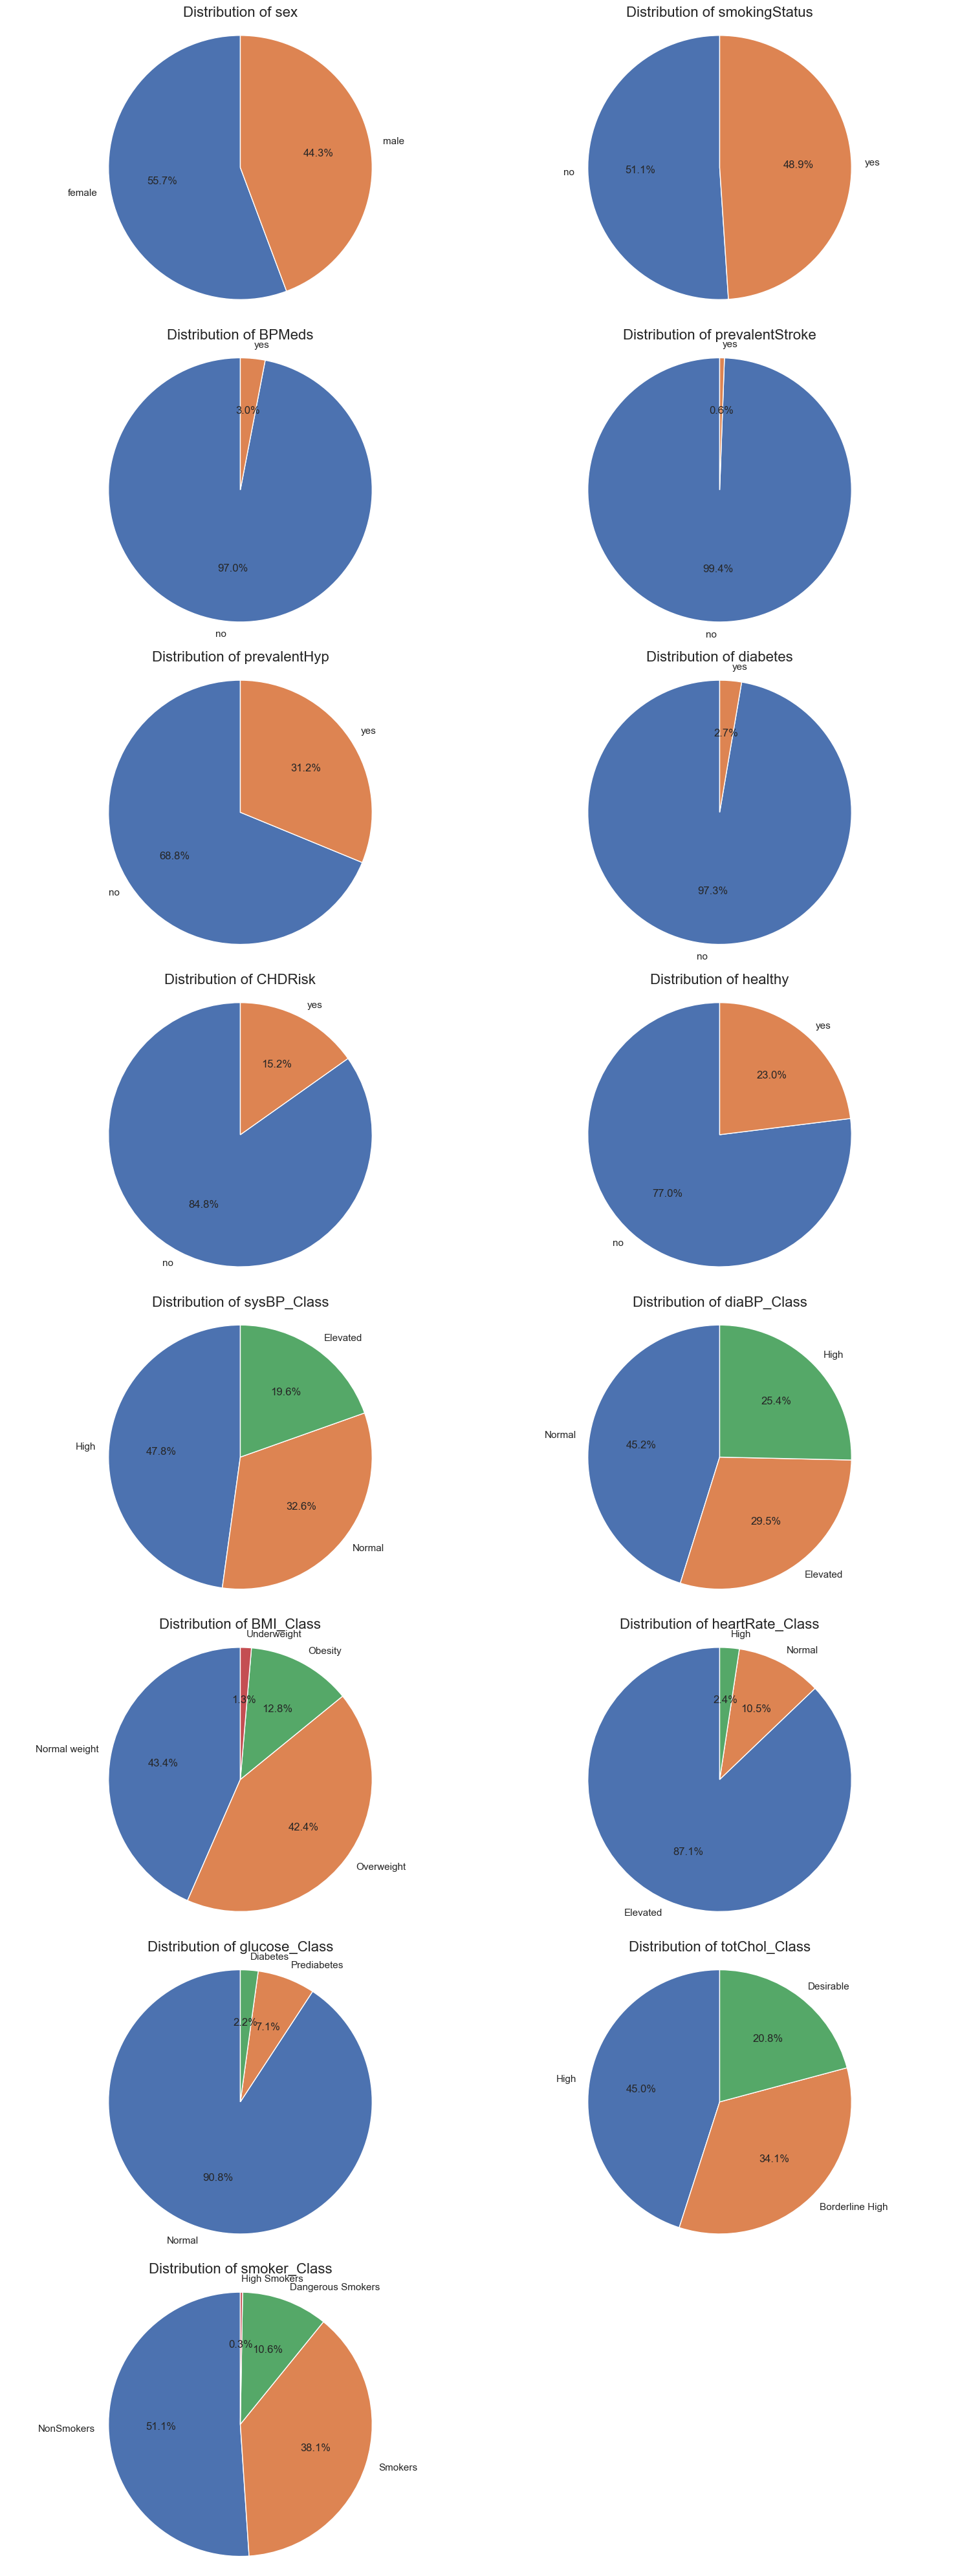

In [22]:
#Pie plot(catigorical)
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Select non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Determine the number of rows and columns needed for subplots
num_cols = 2
num_rows = (len(non_numeric_columns) + 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the non-numeric columns and create a pie chart for each
for i, col in enumerate(non_numeric_columns):
    
    # Calculate counts
    counts = df[col].value_counts()

    # Create pie chart
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

    # Set the title
    axes[i].set_title(f"Distribution of {col}", fontsize=16)

    # Equal aspect ratio ensures that pie is drawn as a circle.
    axes[i].axis('equal')  

# If the number of non-numeric columns is odd, remove the last (empty) subplot
if len(non_numeric_columns) % num_cols:
    fig.delaxes(axes[-1])

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

| Category                       | Distribution | Count   | Insight                                                                                   |
|--------------------------------|--------------|---------|-------------------------------------------------------------------------------------------|
| Sex                            | Female       | 55.7%   | There are more females than males in the dataset.                                        |
|                                | Male         | 44.3%   |                                                                                           |
| Smoking Status                 | No           | 51.1%   | The number of smokers and non-smokers is fairly balanced, with a slight predominance of non-smokers. |
|                                | Yes          | 48.9%   |                                                                                           |
| BPMeds (Blood Pressure Meds)   | No           | 97.0%   | The vast majority of participants are not on blood pressure medication.                    |
|                                | Yes          | 3.0%    |                                                                                           |
| Prevalent Stroke               | No           | 99.4%   | Very few participants have had a stroke.                                                  |
|                                | Yes          | 0.6%    |                                                                                           |
| Prevalent Hypertension         | No           | 68.8%   | A significant portion of participants have hypertension, but those without it are still in the majority. |
|                                | Yes          | 31.2%   |                                                                                           |
| Diabetes                       | No           | 97.3%   | Few participants have diabetes.                                                           |
|                                | Yes          | 2.7%    |                                                                                           |
| CHDRisk (Coronary Heart Disease)| No           | 84.8%   | A notable number of participants are at risk for coronary heart disease, but those without risk are in the majority. |
|                                | Yes          | 15.2%   |                                                                                           |
| Healthy                        | No           | 77.0%   | The majority of participants are not classified as healthy.                                |
|                                | Yes          | 23.0%   |                                                                                           |
| SysBP_Class (Systolic BP)      | High         | 47.8%   | There are more participants with high systolic blood pressure compared to normal or elevated. |
|                                | Normal       | 32.6%   |                                                                                           |
|                                | Elevated     | 19.6%   |                                                                                           |
| DiaBP_Class (Diastolic BP)     | Normal       | 45.2%   | More participants have normal diastolic blood pressure than elevated or high.               |
|                                | Elevated     | 29.5%   |                                                                                           |
|                                | High         | 25.4%   |                                                                                           |
| BMI_Class (Body Mass Index)    | Normal weight| 43.4%   | The majority of participants are either of normal weight or overweight, with fewer classified as obese or underweight. |
|                                | Overweight   | 42.4%   |                                                                                           |
|                                | Obesity      | 12.8%   |                                                                                           |
|                                | Underweight  | 1.3%    |                                                                                           |
| HeartRate_Class                | Elevated     | 87.1%   | Most participants have an elevated heart rate.                                             |
|                                | Normal       | 10.5%   |                                                                                           |
|                                | High         | 2.4%    |                                                                                           |
| Glucose_Class                  | Normal       | 90.8%   | The majority of participants have normal glucose levels, with fewer in the pre-diabetes or diabetes categories. |
|                                | Pre-diabetes | 7.1%    |                                                                                           |
|                                | Diabetes     | 2.2%    |                                                                                           |
| TotChol_Class (Total Cholesterol)| High        | 45.0%   | Many participants have high cholesterol levels, followed by borderline high and desirable levels. |
|                                | Borderline High | 34.1% |                                                                                           |
|                                | Desirable    | 20.8%   |                                                                                           |
| Smoker_Class                   | Non-smokers  | 51.1%   | There are more non-smokers than smokers, with a smaller number of participants classified as dangerous or high smokers. |
|                                | Smokers      | 38.1%   |                                                                                           |
|                                | Dangerous Smokers | 10.6% |                                                                                           |
|                                | High Smokers | 0.3%    |                                                                                           |


In [23]:
## Histogram with Thresholds
for col in df.select_dtypes(include=[np.number]).columns:

    # Column Name
    print(f"Column: {col}")

    # Histogram
    fig = px.histogram(df, x=col, marginal="box")
    fig.update_layout(title="Distribution of " + col, xaxis_title_text=col, yaxis_title_text='Frequency')
    fig.update_layout(title_x=0.5)
    ##fig.add_vline(x=df[col].mean(), line_color='red', annotation_text="Mean", annotation_position="top left")
    ##fig.add_vline(x=df[col].median(), line_color='black', annotation_text="Median", annotation_position="top left")

    # Add thresholds
    if col in thresholds:
        for key, value in thresholds[col].items():
            fig.add_vline(x=value, line_dash="dash", line_color='green', annotation_text=key, annotation_position="top right")

    fig.show()

    # Separator
    print("="*200)

Column: age


Column: education


Column: cigsPerDay


Column: totChol


Column: sysBP


Column: diaBP


Column: BMI


Column: heartRate


Column: glucose


In [24]:
def generate_pie_charts(df, categorical_columns):
    """
    Generates pie charts for each categorical column in the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    categorical_columns (list): A list of column names to generate pie charts for.
    """
    # Pie Chart
    fig = px.pie(data_frame=df, names=col, title=f"Distribution of {col}")
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(title_x=0.5)
    fig.show()

    

## Bivariate Analysis (plotly)

# Categorical Data

In [25]:
df.select_dtypes(exclude=[np.number]).columns

Index(['sex', 'smokingStatus', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'CHDRisk', 'healthy', 'sysBP_Class', 'diaBP_Class',
       'BMI_Class', 'heartRate_Class', 'glucose_Class', 'totChol_Class',
       'smoker_Class'],
      dtype='object')

In [26]:
cat_col=['sex', 'smokingStatus', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'healthy', 'sysBP_Class', 'diaBP_Class',
       'BMI_Class', 'heartRate_Class', 'glucose_Class', 'totChol_Class',
       'smoker_Class']

### Plots bar charts for CHDRisk against categorical columns (cat_col).

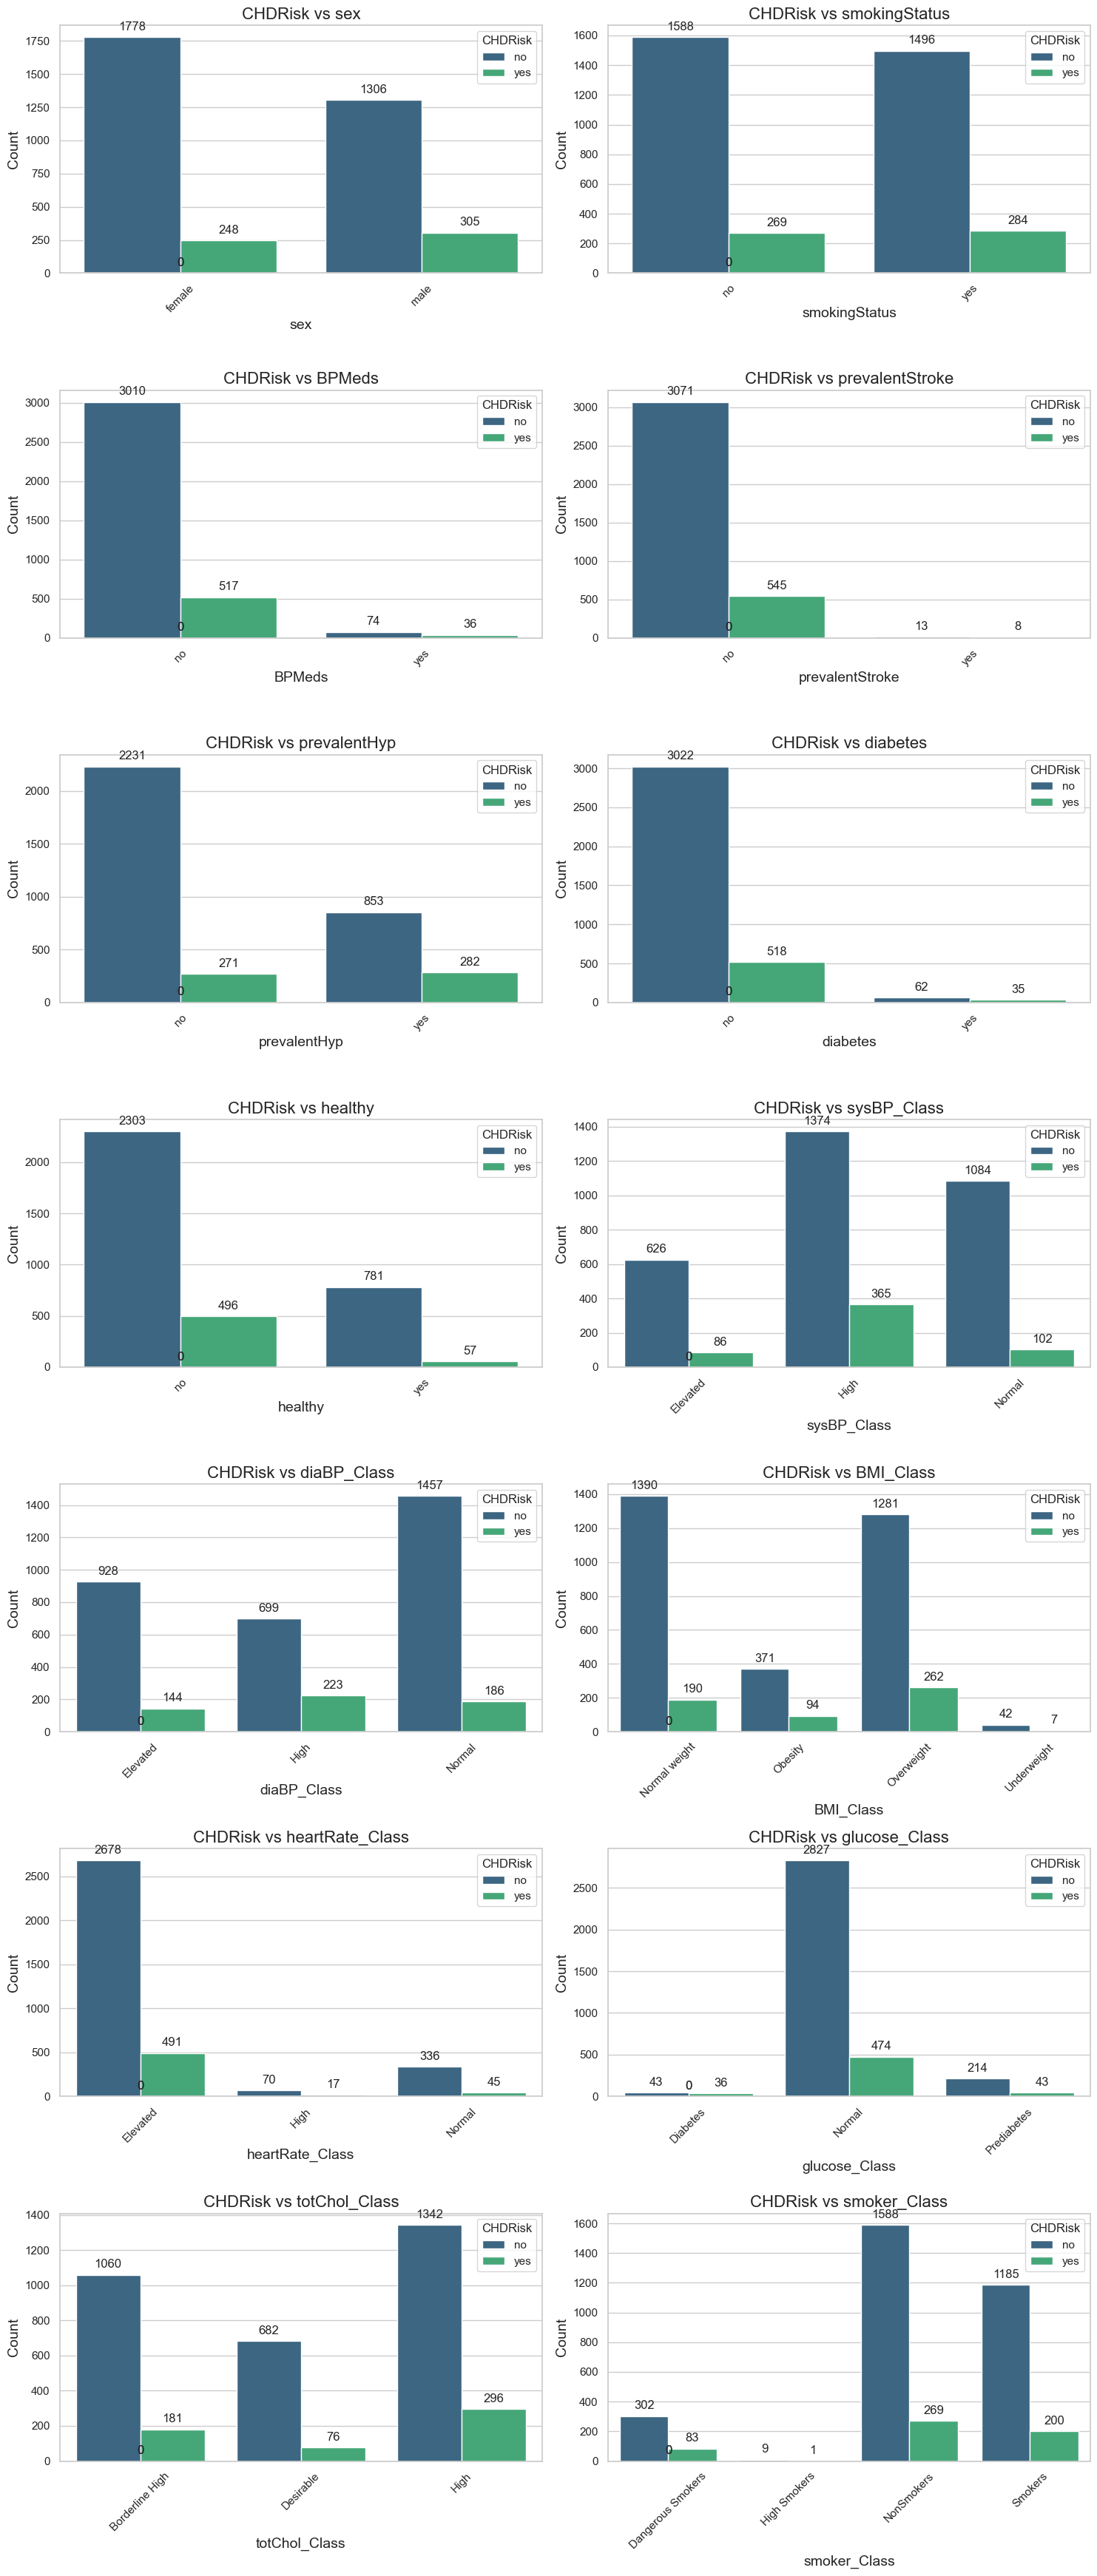

In [27]:
sns.set(style="whitegrid")

# Create subplots
num_cols = 2
num_rows = (len(cat_col) + 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(cat_col):
    # Group by 'CHDRisk' and the categorical column
    risk_counts = df.groupby(['CHDRisk', col]).size().reset_index(name='count').sort_values(col)

    # Create a count plot (barplot) with Seaborn
    sns.barplot(data=risk_counts, x=col, y='count', hue='CHDRisk', ax=axes[i], palette='viridis')

    # Set the title and labels
    axes[i].set_title(f"CHDRisk vs {col}", fontsize=16)
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel("Count", fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)

    # Add value annotations
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# If the number of categorical columns is odd, remove the last (empty) subplot
if len(cat_col) % num_cols:
    fig.delaxes(axes[-1])

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

### CHDRisk vs Sex:

* Males have a higher CHD risk compared to females. The number of males with CHD risk (305) is significantly higher than females (248).

### CHDRisk vs Smoking Status:

* Both smokers and non-smokers have a CHD risk, but the count is higher among smokers (284) compared to non-smokers (269).

### CHDRisk vs BPMeds:

* Those not on blood pressure medication have a higher CHD risk (517) compared to those on medication (36). This might indicate a potential reduction in CHD risk with proper medication.

### CHDRisk vs Prevalent Stroke:

* People without a prevalent stroke history have a much higher count of CHD risk (545) compared to those with a history of stroke (8). This suggests that while stroke history is important, it might be less common among those with CHD.

### CHDRisk vs Prevalent Hypertension (Hyp):

* Individuals without hypertension have a higher count of CHD risk (271) compared to those with hypertension (282). This shows hypertension is a significant risk factor for CHD.

### CHDRisk vs Diabetes:

* People without diabetes have a significantly higher CHD risk (518) compared to those with diabetes (35). This suggests that CHD risk is prevalent even among non-diabetics, but diabetes remains a crucial risk factor.

### CHDRisk vs Healthy:

* Individuals who are generally healthy have a lower CHD risk (57) compared to those who are not healthy (496). This emphasizes the importance of overall health in reducing CHD risk.

### CHDRisk vs Systolic Blood Pressure (sysBP) Class:

* Those with normal systolic BP have a higher CHD risk count (365) compared to those with elevated BP (86). This might indicate that even those with normal BP are at risk if other factors are present.

### CHDRisk vs Diastolic Blood Pressure (diaBP) Class:

* People with normal diastolic BP have a higher CHD risk count (186) compared to those with elevated diastolic BP (144). This again shows that CHD risk is not solely dependent on BP class but on a combination of factors.

### CHDRisk vs BMI Class:

* Individuals who are obese or overweight have a higher CHD risk (262 and 371, respectively) compared to those with normal weight (190). This highlights the significant impact of BMI on CHD risk.

### CHDRisk vs Heart Rate Class:

* Those with a normal heart rate have a lower CHD risk (45) compared to those with elevated heart rates (491). High heart rate is a significant indicator of CHD risk.

### CHDRisk vs Glucose Class:

* Normal glucose levels are associated with a higher CHD risk count (474), but diabetic glucose levels (36) still pose a risk. This shows glucose levels are an important factor but not the only determinant.

### CHDRisk vs Total Cholesterol (totChol) Class:

* High cholesterol levels (296) have a strong association with CHD risk compared to borderline high (181) and desirable levels (682). Managing cholesterol is crucial in CHD risk reduction.

### CHDRisk vs Smoker Class:

* Nonsmokers (high or low) and current smokers all show CHD risk, but high nonsmokers (269) and current smokers (200) show significant counts. Smoking status is a critical factor in CHD risk.

## Key Insights:
* Males, smokers, and those not on BP medication are at higher risk for CHD.
* Hypertension, diabetes, poor overall health, high BMI, elevated heart rate, and high cholesterol significantly increase CHD risk.
* Even individuals with normal BP or glucose levels can have a high CHD risk if other risk factors are present.
* Lifestyle factors such as smoking and overall health maintenance are critical in managing CHD risk.

In [28]:
def plot_chd_risk_vs_categories(df,cat_col):
    
    risk_counts = df.groupby(['CHDRisk', col]).size().reset_index(name='count').sort_values(col)
    fig = px.bar(risk_counts, x=col, y='count', color='CHDRisk', barmode='group', text_auto=True)
    fig.update_layout(title="CHDRisk VS " + col)
    fig.update_layout(xaxis_title=col)
    fig.update_traces(textposition='outside')
    fig.update_layout(title_x=0.5)
    fig.show()

    # Separator
    print("="*200)

## Numerical Data

### Plots histogram for CHDRisk against numerical columns (num_col).

In [29]:
df.select_dtypes(include=[np.number]).columns

Index(['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'],
      dtype='object')

In [30]:
num_col=['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose']

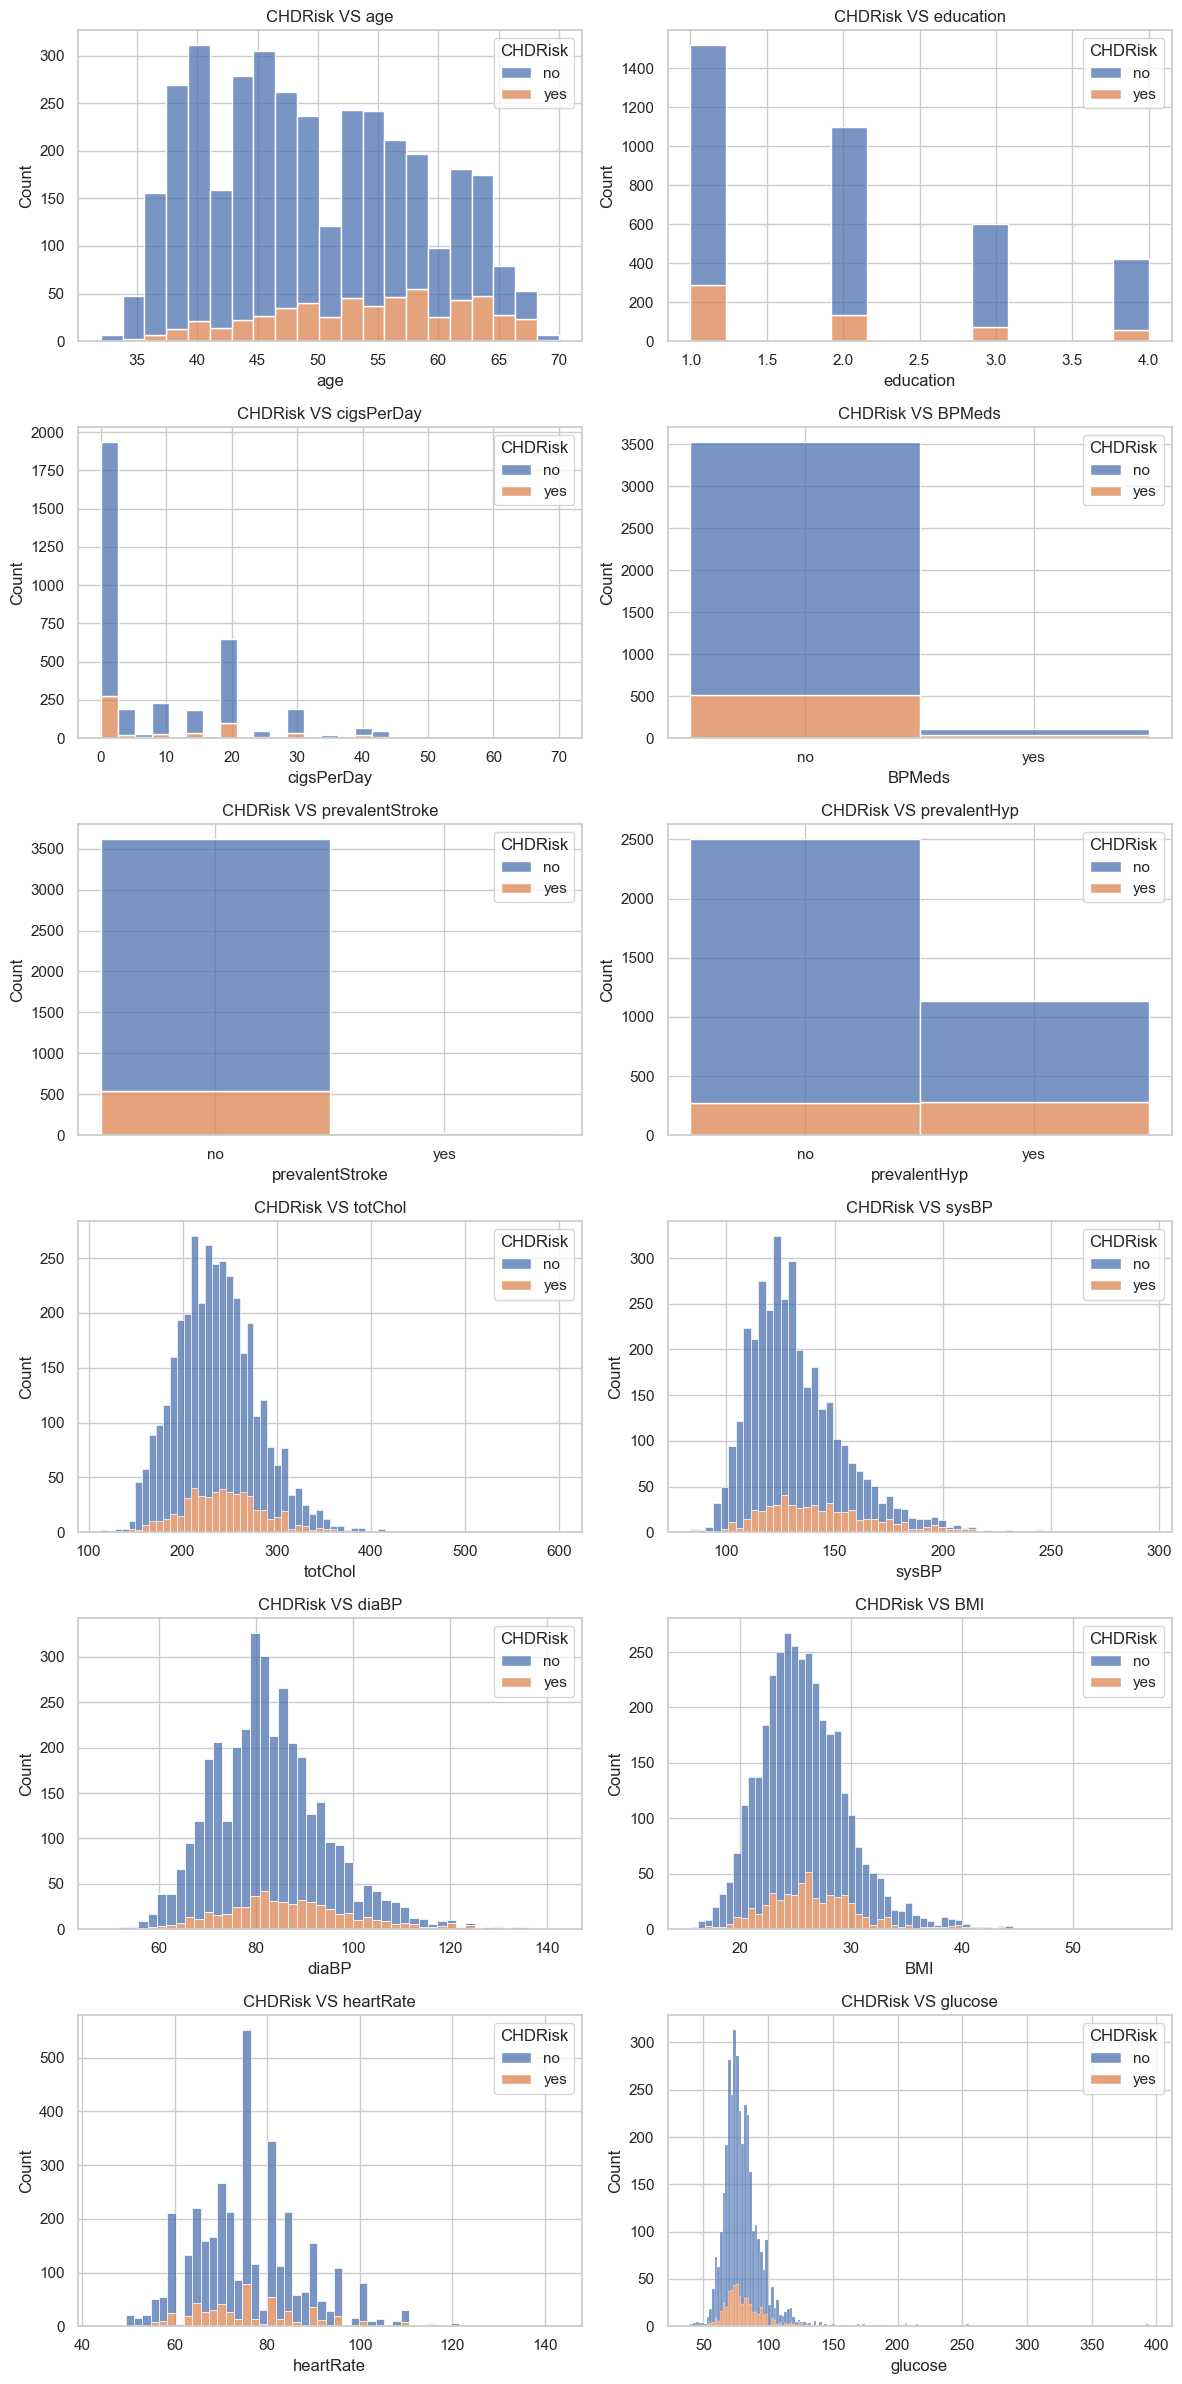

In [31]:
sns.set(style="whitegrid")

num_cols = 2
num_rows = (len(num_col) + 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(num_col):
    # Create a histogram with Seaborn
    sns.histplot(data=df, x=col, hue='CHDRisk', multiple='stack', kde=False, ax=axes[i])

    # Set the title and labels
    axes[i].set_title(f"CHDRisk VS {col}")
    axes[i].set_xlabel(col)

    

# Hide unused subplots
if len(num_col) < num_rows * num_cols:
    for j in range(len(num_col), num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

### CHDRisk vs Age:
* CHD risk increases with age, peaking around the ages of 50 to 55. There is a notable increase in CHD risk starting from the age of 40.

### CHDRisk vs Education:
* Lower levels of education (1.0 to 2.0) are associated with a higher CHD risk. The risk decreases as the level of education increases, indicating a potential correlation between higher education and lower CHD risk.

### CHDRisk vs Cigarettes Per Day (cigsPerDay):
* There is a higher CHD risk among individuals who smoke more cigarettes per day. The majority of people with CHD risk fall into the category of smoking fewer than 10 cigarettes per day, but the risk increases significantly for those smoking more than 20 cigarettes per day.

### CHDRisk vs BPMeds:
* Individuals not on blood pressure medication have a higher CHD risk compared to those on medication, similar to the previous insights. This suggests effective management of blood pressure can reduce CHD risk.

### CHDRisk vs Prevalent Stroke:
* Most individuals with CHD risk do not have a history of stroke. However, a small number of individuals with a history of stroke also exhibit CHD risk, underscoring the connection between stroke and CHD.

### CHDRisk vs Prevalent Hypertension (Hyp):
* A significant portion of individuals with hypertension also exhibit CHD risk. Hypertension is a notable risk factor for CHD, as evidenced by the larger count of CHD risk among those with prevalent hypertension.

### CHDRisk vs Total Cholesterol (totChol):
* Higher total cholesterol levels are associated with an increased CHD risk. The distribution shows that individuals with CHD risk tend to have higher cholesterol levels, emphasizing the importance of managing cholesterol for heart health.

### CHDRisk vs Systolic Blood Pressure (sysBP):
* Elevated systolic blood pressure is correlated with an increased CHD risk. Individuals with higher systolic BP readings show a higher count of CHD risk.

### CHDRisk vs Diastolic Blood Pressure (diaBP):
* Similar to systolic BP, elevated diastolic blood pressure is associated with an increased CHD risk. Managing both systolic and diastolic BP is crucial in reducing CHD risk.

### CHDRisk vs BMI:
* Higher BMI is strongly associated with increased CHD risk. Individuals with a BMI in the range of 25 to 35 show a significant count of CHD risk, indicating the impact of obesity on heart health.

### CHDRisk vs Heart Rate:
* Higher resting heart rates are associated with increased CHD risk. The distribution indicates that individuals with CHD risk tend to have higher heart rates.

### CHDRisk vs Glucose:
* Elevated glucose levels are correlated with increased CHD risk. Individuals with higher glucose levels show a higher count of CHD risk, highlighting the importance of managing blood sugar levels to mitigate heart disease risk.


### Key Insights:
* Age: CHD risk increases significantly after the age of 40, peaking around 50-55 years.
* Education: Lower education levels are linked to higher CHD risk.
* Smoking: Higher cigarette consumption per day increases CHD risk.
* Blood Pressure Medication: Proper management with medication reduces CHD risk.
* Stroke and Hypertension: Both are significant risk factors for CHD.
* Cholesterol: High total cholesterol levels are a strong indicator of CHD risk.
* Blood Pressure: Both systolic and diastolic pressures are important factors.
* BMI: Higher BMI correlates with increased CHD risk, emphasizing the impact of obesity.
* Heart Rate: Elevated resting heart rate is a notable risk factor.
* Glucose: High blood glucose levels are associated with increased CHD risk.

In [32]:
for col in num_col:
  # Column Name
  print(f"Column: {col}")

  # Bar Plot
  Risk_count = df.groupby(['CHDRisk', col]).size().reset_index(name='count')
  fig = px.histogram(Risk_count, x=col, y='count', color='CHDRisk', barmode='group',text_auto=True)
  fig.update_layout(title="CHDRisk  VS " + col)
  fig.update_layout(xaxis_title= col)
  fig.update_traces(textposition='outside')
  fig.update_layout(title_x=.5)
  fig.show()


  # Separator
  print("="*200)

Column: age


Column: education


Column: cigsPerDay


Column: BPMeds


Column: prevalentStroke


Column: prevalentHyp


Column: totChol


Column: sysBP


Column: diaBP


Column: BMI


Column: heartRate


Column: glucose


In [33]:
for col in num_col:
    # Print the column name
    print(f"Column: {col}")

    # Create a histogram with Plotly Express
    fig = px.histogram(df, x=col, color='CHDRisk', barmode='group', title=f"CHDRisk VS {col}")
    
    # Update layout for better readability
    fig.update_layout(xaxis_title=col, yaxis_title='Count')
    fig.update_traces(textposition='outside')
    
    # Show the plot
    fig.show()

    # Separator
    print("="*200)

Column: age


Column: education


Column: cigsPerDay


Column: BPMeds


Column: prevalentStroke


Column: prevalentHyp


Column: totChol


Column: sysBP


Column: diaBP


Column: BMI


Column: heartRate


Column: glucose


In [34]:
# Assuming 'df' is your DataFrame and 'num_col' is the list of numerical columns
for col in num_col:
    # Create histogram with Plotly Express
    fig = px.histogram(df, x=col, color='CHDRisk', barmode='overlay', title=f"CHDRisk VS {col}")

    # Show the plot
    fig.show()

    # Separator
    print("="*200)

In [35]:
cat_col


['sex',
 'smokingStatus',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'healthy',
 'sysBP_Class',
 'diaBP_Class',
 'BMI_Class',
 'heartRate_Class',
 'glucose_Class',
 'totChol_Class',
 'smoker_Class']

## Correlation

In [36]:
num_col

['age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

C:\Users\samys\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



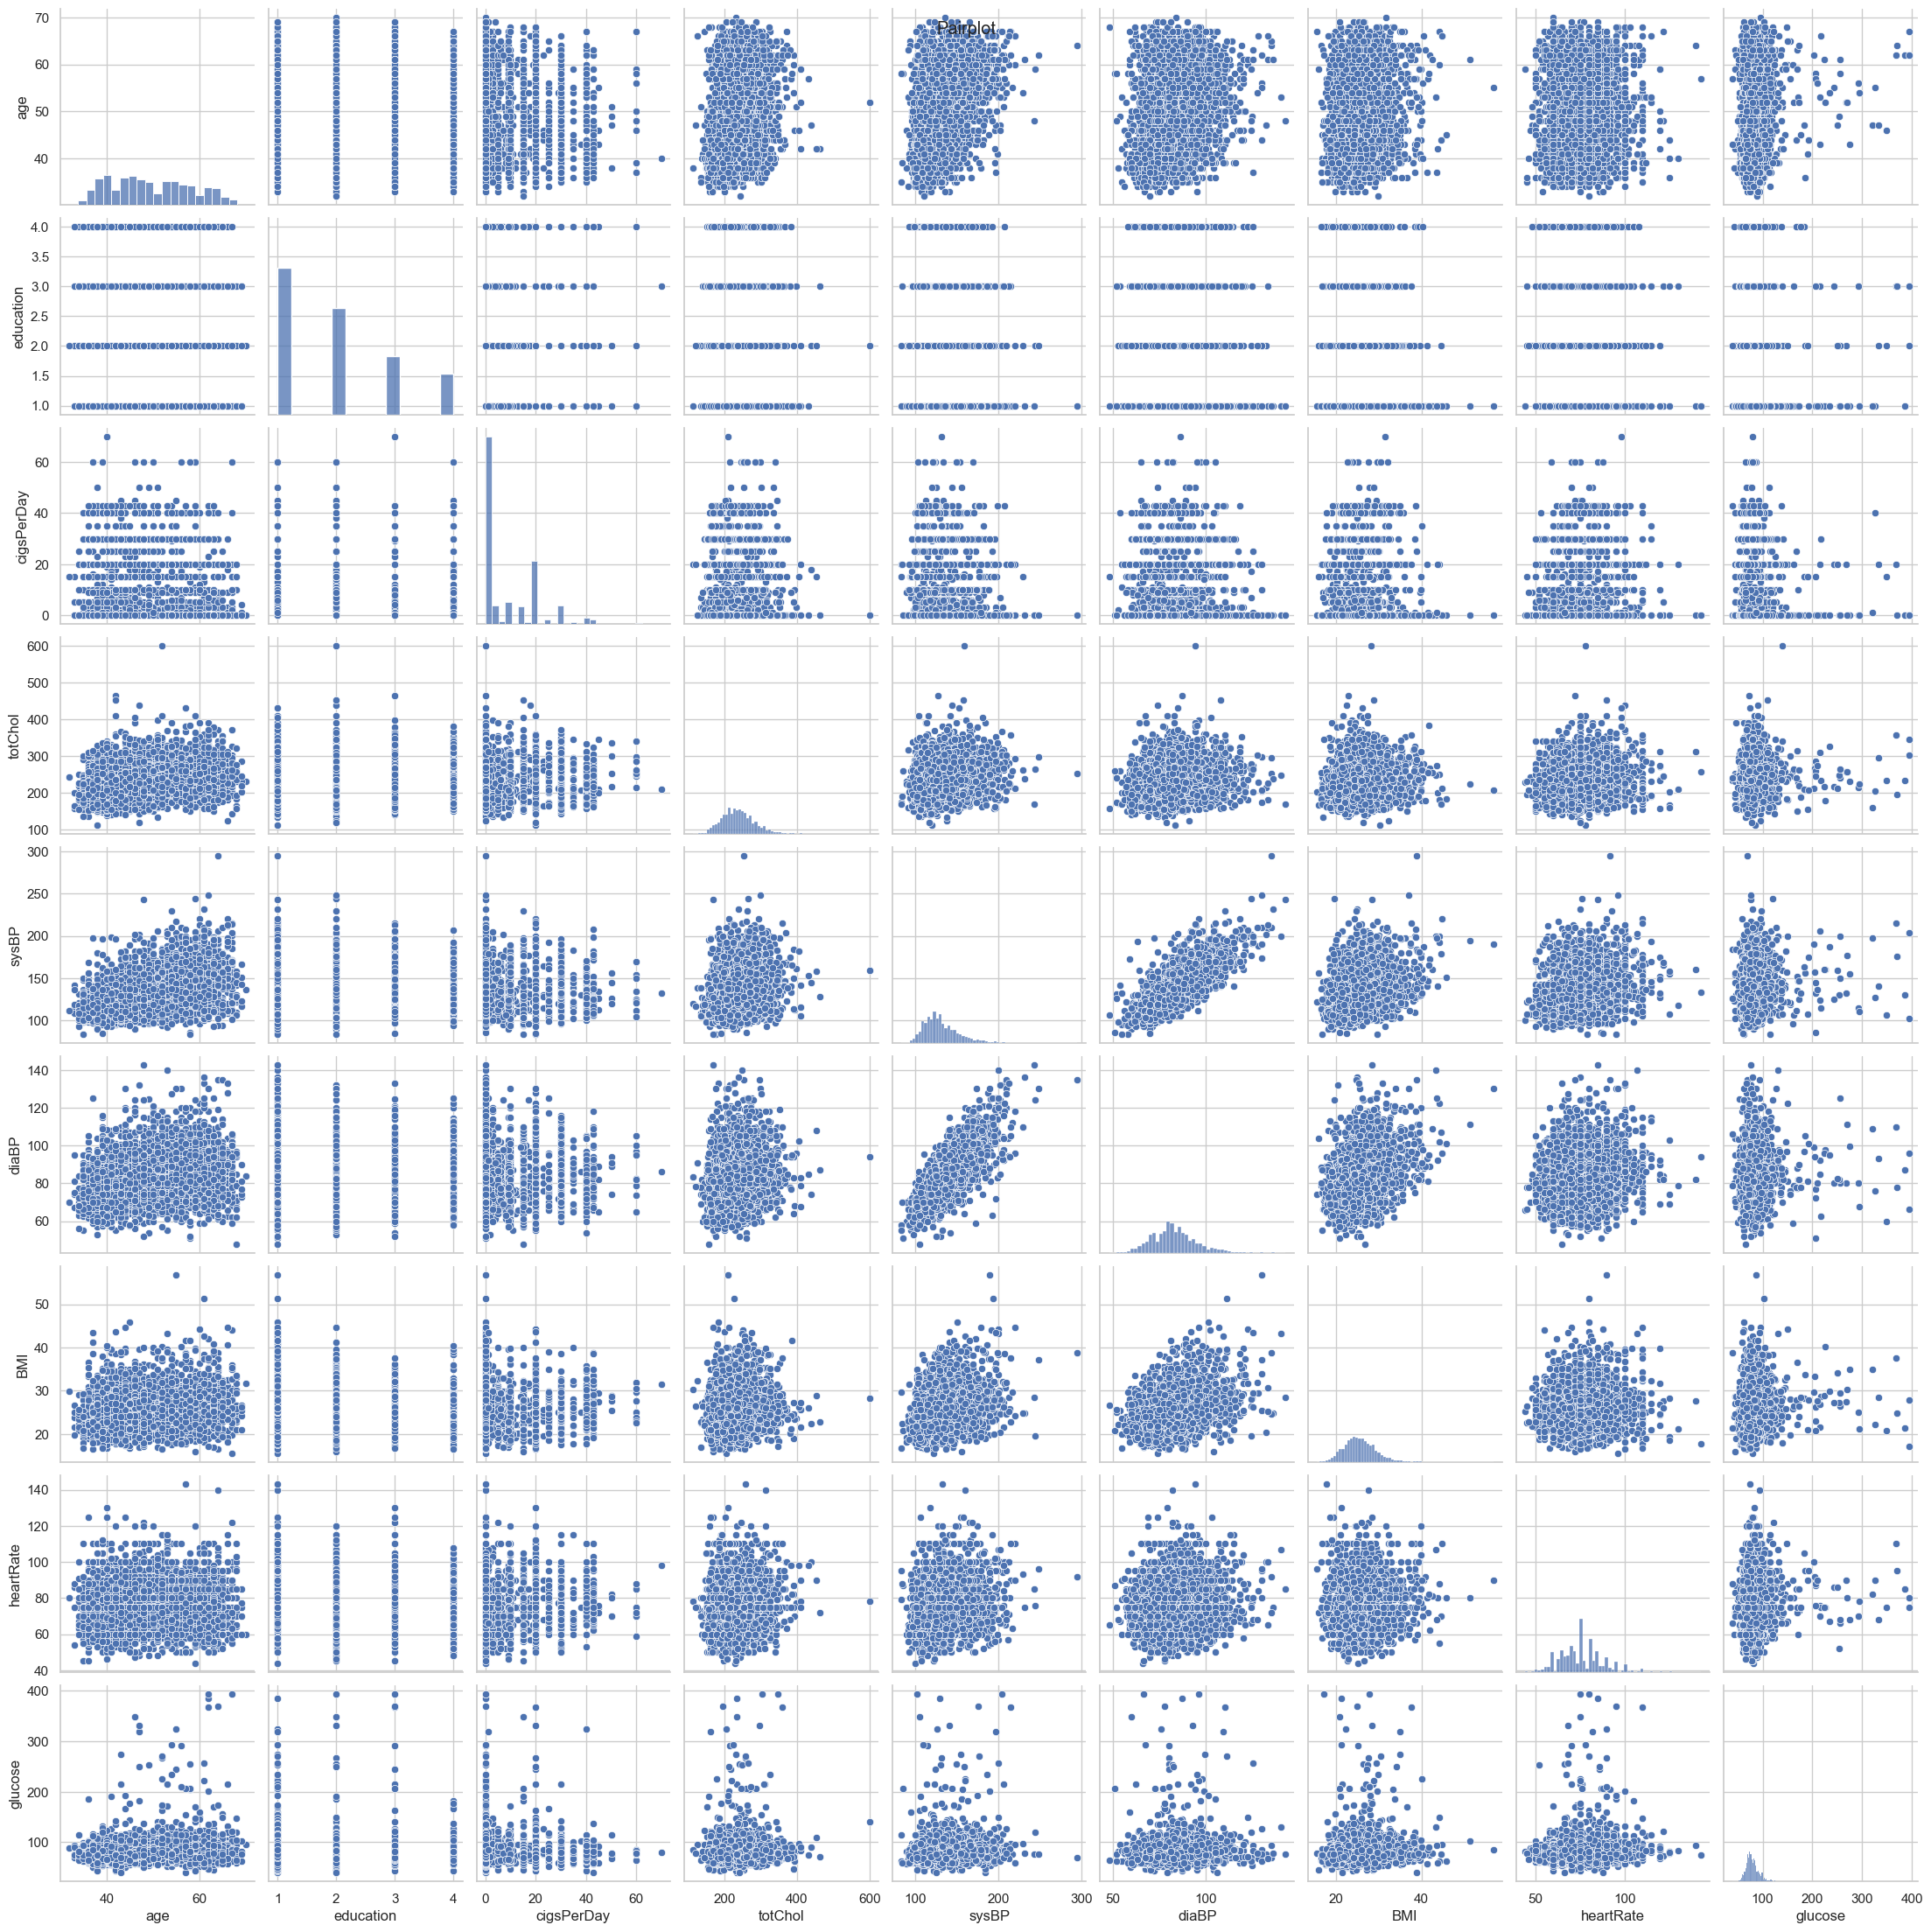

In [37]:
# Assuming 'df' is your DataFrame and 'num_col' is the list of numerical columns
sns.pairplot(df[num_col], diag_kind='hist')

# To add a title, you'll need to use matplotlib's suptitle function
plt.suptitle("Pairplot")

# Display the plot
plt.show()

### Age:

* Age shows a positive correlation with systolic BP, diastolic BP, and BMI. Older individuals tend to have higher blood pressure and BMI.
There is no clear pattern of correlation between age and cholesterol or glucose levels.
### Education:

* Higher education levels show a weak negative correlation with smoking (cigsPerDay). People with higher education tend to smoke less.
There is no clear correlation between education and other health metrics like cholesterol, BP, or glucose.
### Cigarettes Per Day (cigsPerDay):

* Smoking shows a positive correlation with systolic BP, diastolic BP, and heart rate. Higher smoking rates are associated with higher BP and  heart rate.
Smoking does not show a clear pattern of correlation with cholesterol or glucose levels.
### Total Cholesterol (totChol):

* Total cholesterol shows a weak positive correlation with systolic BP and diastolic BP, indicating that higher cholesterol levels may be associated with higher BP.
There is a positive correlation between total cholesterol and glucose levels.
### Systolic Blood Pressure (sysBP):

* Systolic BP shows a strong positive correlation with diastolic BP. Higher systolic BP is associated with higher diastolic BP.
Systolic BP also shows a positive correlation with BMI, indicating that individuals with higher BMI tend to have higher systolic BP.
There is no clear pattern of correlation between systolic BP and glucose.
### Diastolic Blood Pressure (diaBP):

* Diastolic BP shows a positive correlation with BMI and heart rate. Higher diastolic BP is associated with higher BMI and heart rate.
Diastolic BP also shows a weak positive correlation with glucose levels.
### BMI:

* BMI shows a positive correlation with heart rate and glucose levels. Higher BMI is associated with higher heart rate and glucose levels.
There is no clear pattern of correlation between BMI and cholesterol levels.
### Heart Rate:

* Heart rate shows a weak positive correlation with glucose levels. Higher heart rates are associated with higher glucose levels.
There is no clear pattern of correlation between heart rate and cholesterol levels.
### Glucose:

* Glucose shows a positive correlation with cholesterol levels. Higher glucose levels are associated with higher cholesterol levels.


### Key Insights:
* Blood Pressure: Systolic and diastolic BP are strongly correlated with each other and with BMI, indicating that weight management could be crucial for controlling BP.
* Smoking: Higher smoking rates are associated with increased BP and heart rate, suggesting the importance of smoking cessation programs.
* Cholesterol and Glucose: There is a positive correlation between cholesterol and glucose levels, suggesting that individuals with higher cholesterol may also have higher glucose levels.
* BMI and Health Metrics: Higher BMI is associated with higher BP, heart rate, and glucose levels, emphasizing the need for weight management to reduce CHD risk.
* Age: Older age is associated with higher BP and BMI, indicating that age-related interventions could be important in managing CHD risk.

## These insights can help target specific interventions to manage and reduce the risk of Coronary Heart Disease by focusing on key factors such as blood pressure, smoking, cholesterol, glucose levels, and BMI.



In [39]:
# Ensure num_col contains only numeric columns
num_col = df.select_dtypes(include=['number']).columns.tolist()

# Compute the correlation matrix of numerical columns in the DataFrame
corr_matrix = df[num_col].corr()

# Create heatmap
fig = px.imshow(corr_matrix.values,  # Pass the correlation matrix values as the input data
                labels=dict(color="Correlation"),  # Set label for color scale
                x=num_col,  # Set labels for x-axis (column names)
                y=num_col,  # Set labels for y-axis (column names)
                title='Correlation Heatmap',  # Set title for the heatmap
                color_continuous_scale='RdBu_r',  # Set color scale (red to blue)
                zmin=-1,  # Set minimum value for color scale
                zmax=1)  # Set maximum value for color scale

# Add annotations with correlation values
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        fig.add_annotation(x=num_col[i], y=num_col[j], text=f"{corr_matrix.iloc[i, j]:.2f}",
                           showarrow=False, font=dict(color='black', size=10))  # Add annotation to each cell

# Update color bar
fig.update_layout(coloraxis_colorbar=dict(  # Access the color bar of the heatmap
    title="Correlation",  # Set title for the color bar
    tickvals=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],  # Set tick values
    ticktext=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]  # Set corresponding tick labels
))

# Show plot
fig.show()  # Display the heatmap

* sysBP (Systolic Blood Pressure) and diaBP (Diastolic Blood Pressure) show a strong positive correlation (0.79). This indicates that as systolic blood pressure increases, diastolic blood pressure tends to increase as well.
* BMI and weight exhibit a strong positive correlation (0.85). This makes sense as Body Mass Index is calculated using weight and height.
Moderate Positive Correlations:

* age and sysBP (0.39), suggesting that systolic blood pressure tends to increase with age.
* age and diaBP (0.21), indicating a moderate increase in diastolic blood pressure with age.
* age and totChol (0.27), implying that total cholesterol tends to increase with age.
* BMI and sysBP (0.33) and BMI and diaBP (0.38), indicating that higher BMI is associated with higher blood pressure.
Weak Positive Correlations:

* cigsPerDay (Cigarettes per Day) and sysBP (0.07), suggesting a very weak positive relationship between smoking and systolic blood pressure.
* cigsPerDay and totChol (0.08), implying a very weak association between smoking and total cholesterol.
Weak Negative Correlations:

* education and age (-0.16), indicating a weak inverse relationship between education level and age, possibly reflecting younger individuals having higher educational attainment in the sample.
* education and BMI (-0.14), suggesting that higher education levels might be weakly associated with lower BMI.
Negligible Correlations:

Several pairs show correlations close to zero, indicating negligible relationships. For instance, glucose and most other variables have correlations close to zero, suggesting no strong linear relationship with those variables in the dataset.
Key Takeaways:
* Blood pressure metrics (sysBP and diaBP) are strongly correlated with each other.
* Age, BMI, and blood pressure are positively correlated, indicating that both age and higher BMI are associated with higher blood pressure.
* Education shows weak negative correlations with age and BMI, suggesting potential socio-economic influences on health.
* Cigarettes per day show very weak correlations with other health metrics like blood pressure and cholesterol.
